# Predicion de la Diabetes

Importamos todas las librerias (lo hago despues de acabar el projecto para concentrarlo en un mismo punto)

In [91]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from pickle import dump



## EDA Completo

### 📥 1.-Cargar los datos
Cargamos el conjunto de datos de diabetes desde un archivo CSV.

In [92]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 👀 2.Vista previa de los datos
Mostramos las primeras filas del conjunto de datos para entender su estructura.

In [93]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### ✏️ 3.Investigacion

##### 3.1 Investigacion

In [94]:
Columnas = total_data.shape[1]
Filas = total_data.shape[0]
print(f"El dataframe contiene {Columnas} Columnas y {Filas} Filas\n")

total_data.info()

El dataframe contiene 9 Columnas y 768 Filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
# Contar NaN por columna
nulos_por_columna = total_data.isnull().sum()

# Encontrar el valor máximo de NaN
max_nulos = nulos_por_columna.max()

# Filtrar todas las columnas que tienen ese máximo de NaN
columnas_mas_nulos = nulos_por_columna[nulos_por_columna == max_nulos].index.tolist()

# Guardar los total_data de esas columnas en un nuevo DataFrame
datos_columnas_mas_nulos = total_data[columnas_mas_nulos]

# Imprimir resultados
print(f"Las columnas con más valores NaN ({max_nulos} valores nulos) son: {', '.join(columnas_mas_nulos)}\n")

categoricas = total_data.select_dtypes(include=['object', 'category', 'datetime']).columns.tolist()
numericas = total_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
total_categoricas = len(categoricas)
total_numericas = len(numericas)

print(f"En cuanto a tipos de datos tenemos:")
print(f"- {total_categoricas} Características Categóricas: {categoricas}")
print(f"- {total_numericas} Características Numéricas: {numericas}")

columnas_con_duplicados = [col for col in categoricas if total_data[col].duplicated().sum() > 0]
print(f"Las siguientes columnas tienen valores duplicados: {columnas_con_duplicados}\n")

total_data.head()

Las columnas con más valores NaN (0 valores nulos) son: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

En cuanto a tipos de datos tenemos:
- 0 Características Categóricas: []
- 9 Características Numéricas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Las siguientes columnas tienen valores duplicados: []



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


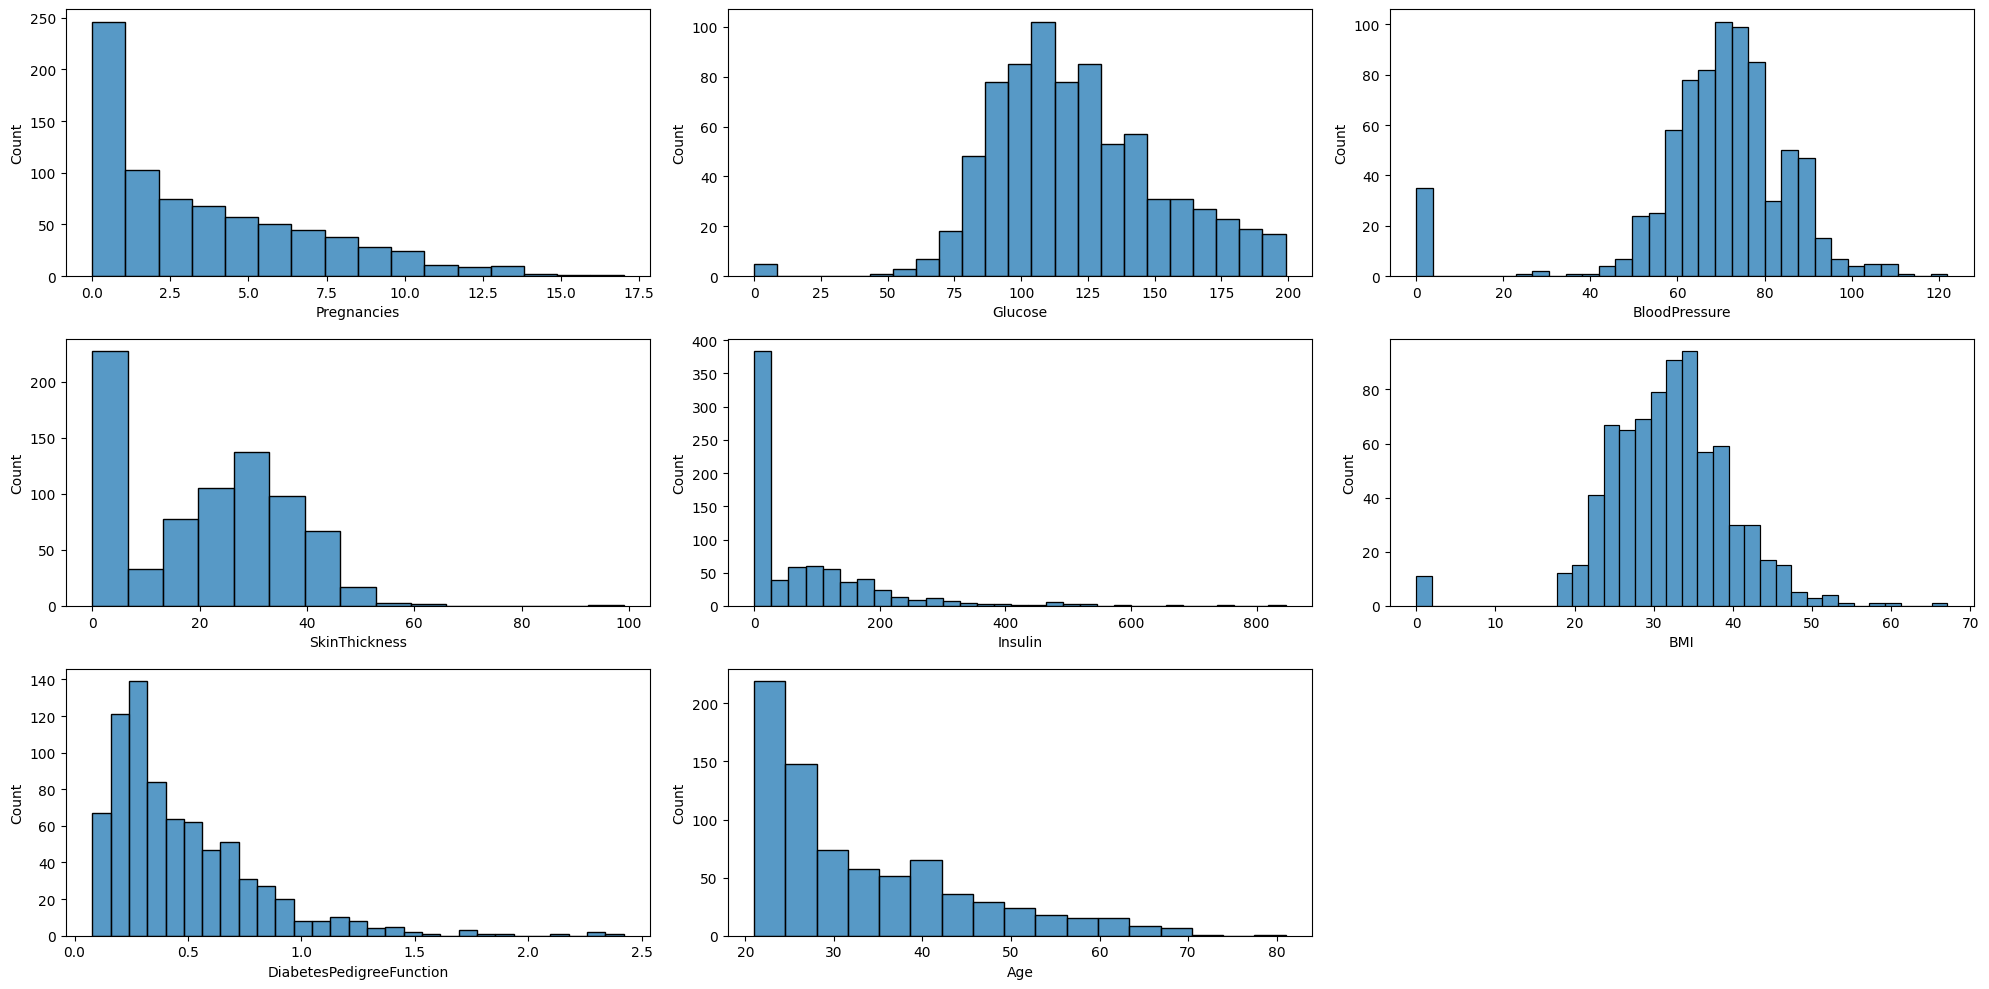

In [96]:
fig, axis = plt.subplots(3, 3, figsize=(20, 10))

# Creacion del Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0,1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[0,2], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[1,0], data = total_data, x = "SkinThickness")
sns.histplot(ax = axis[1,1], data = total_data, x = "Insulin")
sns.histplot(ax = axis[1,2], data = total_data, x = "BMI")
sns.histplot(ax = axis[2,0], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[2,1], data = total_data, x = "Age")
fig.delaxes(axis[2, 2])

# Layout y enseñar la graficota
plt.tight_layout()
plt.show()

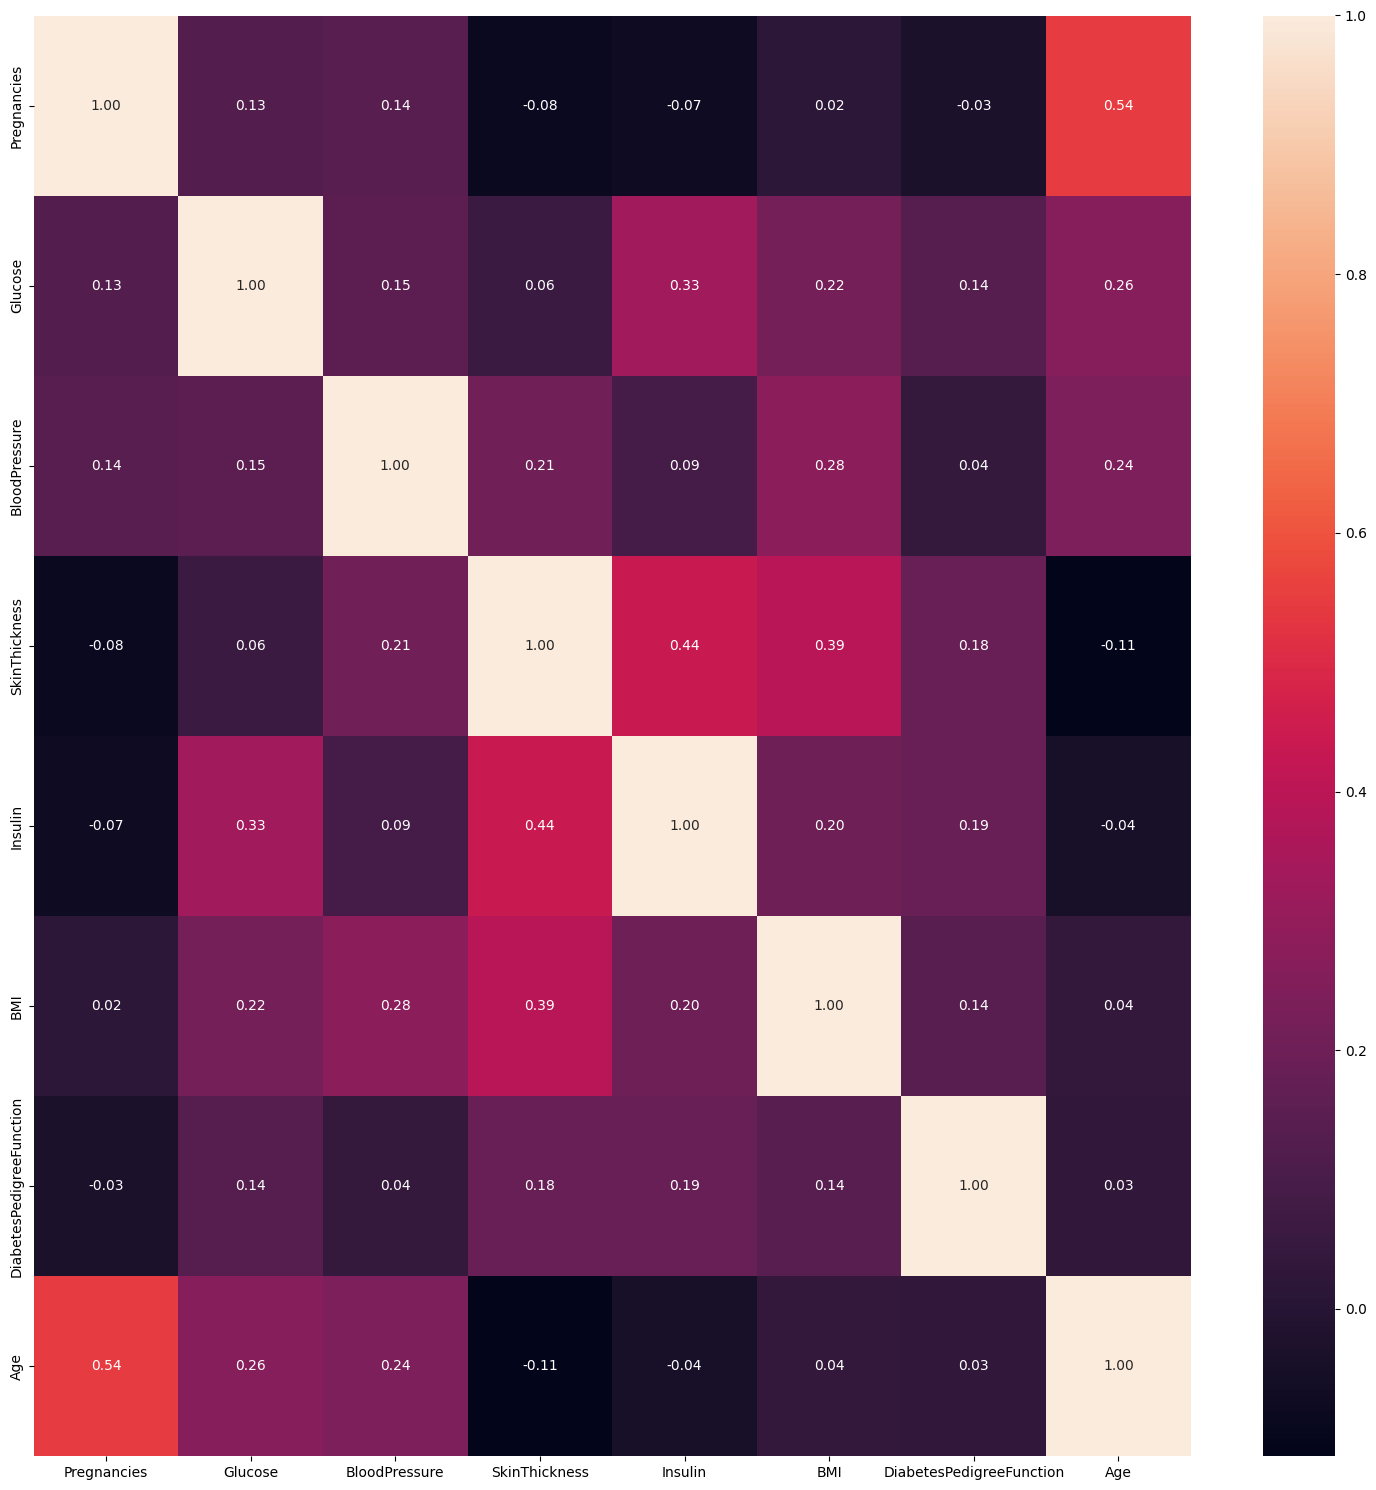

In [97]:
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",	
                        "BMI", "DiabetesPedigreeFunction", "Age"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

1.- 0.54 -> Age x Pregnancies -> Aqui podemos ver que las mujeres joveenes son las que mas se embarazan

2.- 0.44 -> Insulin x Skin Thickness -> Aqui vemos que la gente con mayor grosor de piel tiene mas insulina que es afectado, a la vez, por su BMI (indice de masa corporal) en un 0.39

Es decir que si tienen un mayor BMI, su insulina se dispara, y al estar embarazadas, y aumentar el peso corporal, producen mas insulina

Por lo tanto debemos enfocar nuestros esfuerzos a las personas con mayor indice de BMI y tambien a personas embarazadas ya que, al necesitar insulina y tener esos numeros altos, son los mas propensos a tener diabetes ya que la insulina esta relacionada directamente con la Diabetes.

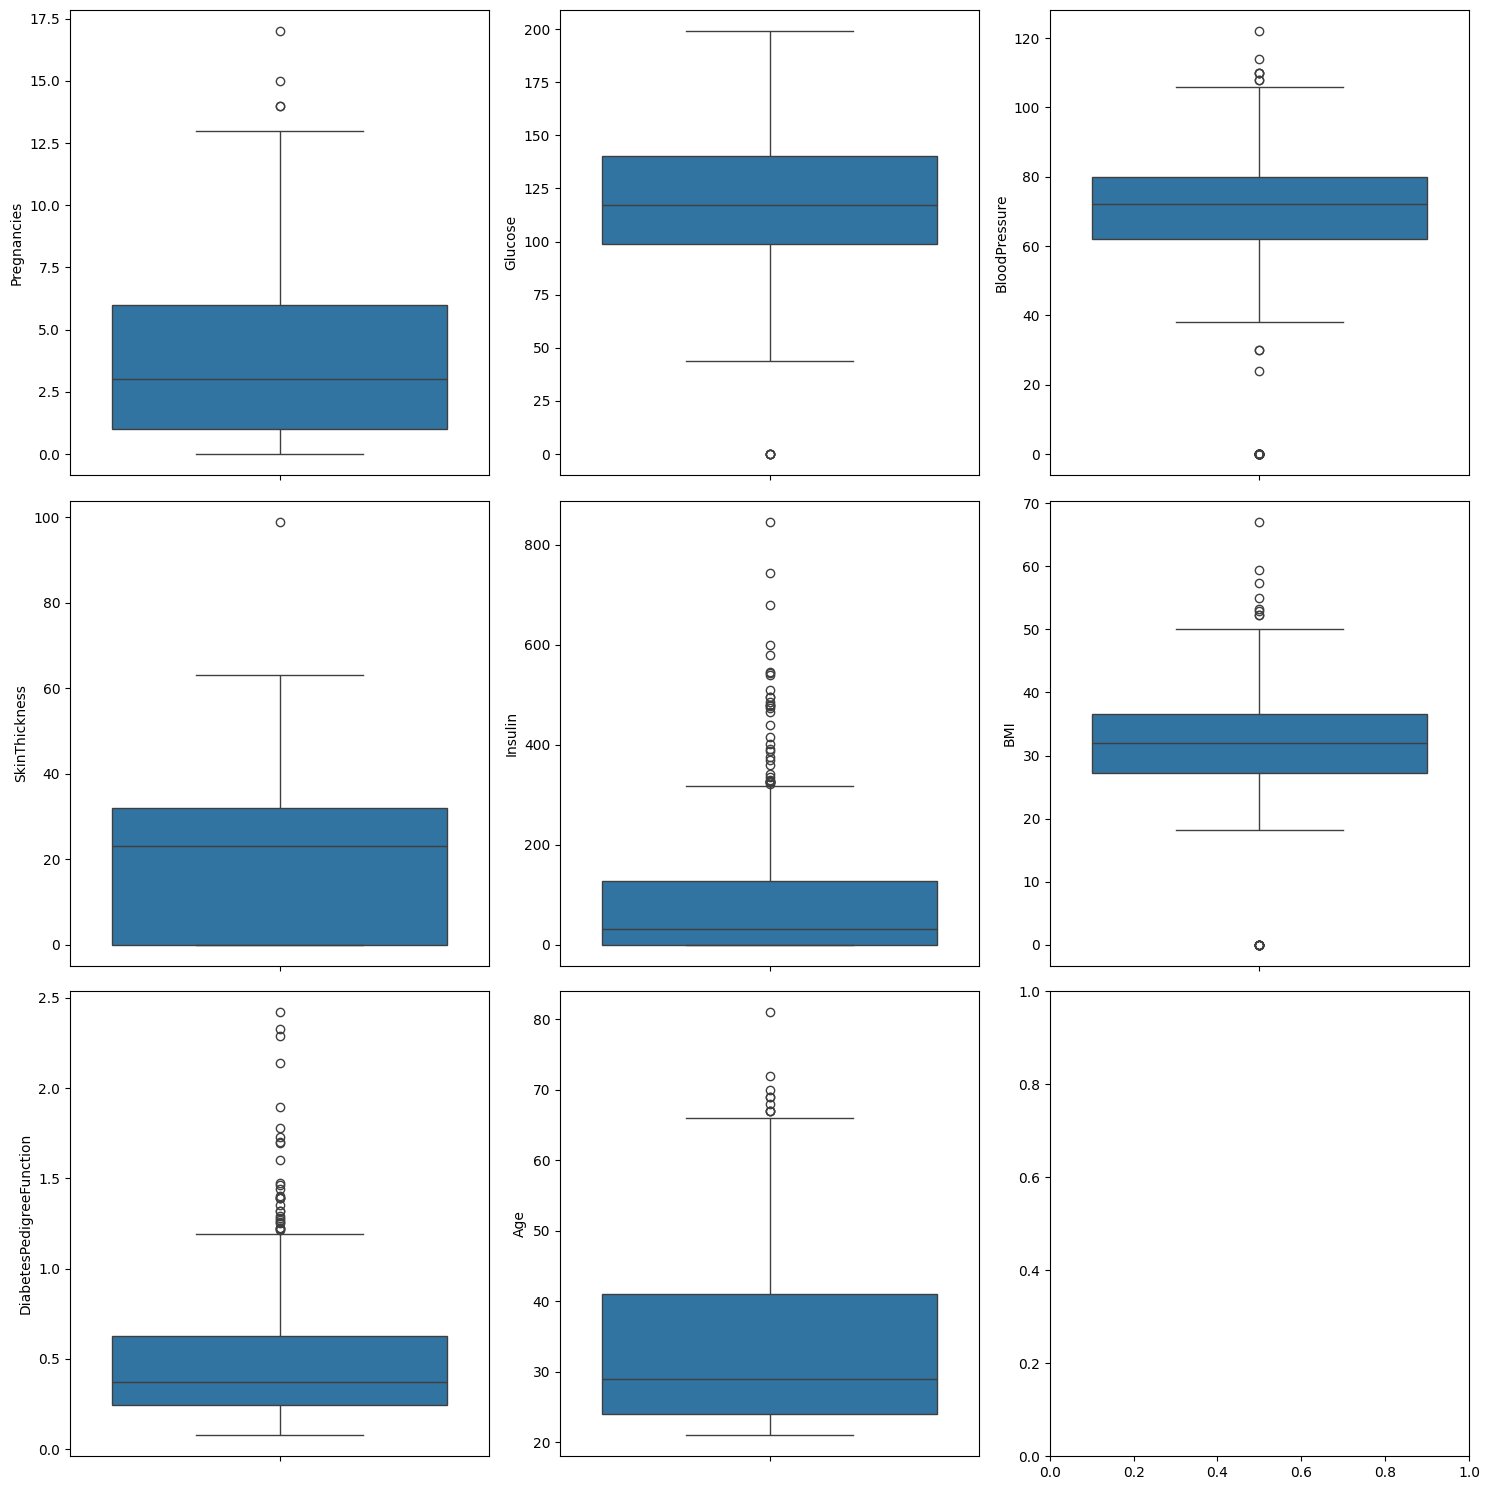

In [98]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Lista de variables a graficar
variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",	
            "BMI", "DiabetesPedigreeFunction", "Age"]

# Generar los boxplots automáticamente
for ax, var in zip(axes.flat, variables):
    sns.boxplot(ax=ax, data=total_data, y=var)

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

### 👀 Vista previa de los datos y entrenamiento
Mostramos las primeras filas del conjunto de datos y empezamos el entrenamiento.

In [99]:
X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


### 👀 Vista previa de los datos
Mostramos las primeras filas del conjunto de datos para entender su estructura.

In [100]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [101]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

## Modelo de Arbol de Decisiones

### 📥 Cargar los datos
Cargamos el conjunto de datos de diabetes desde un archivo CSV.

In [102]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

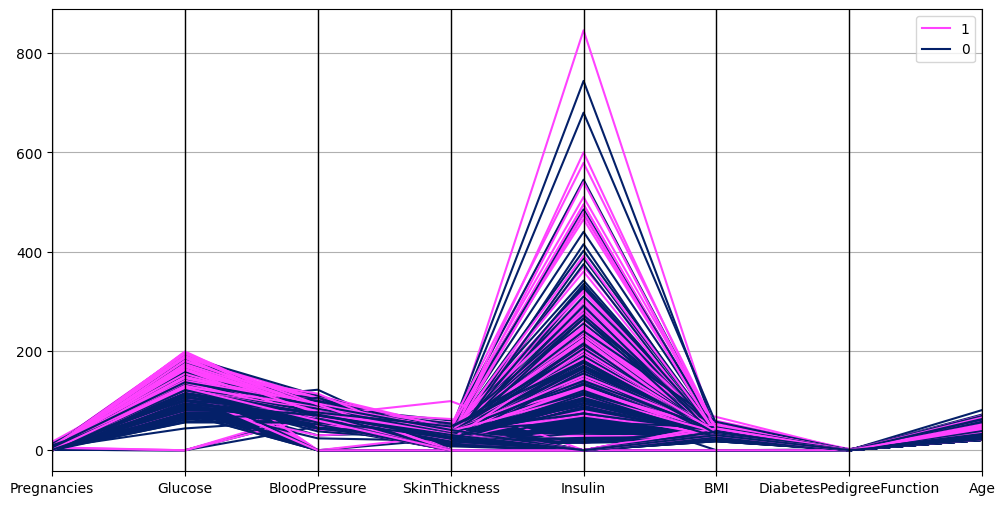

In [103]:

plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#FF42FF", "#042069", "#101097"))
plt.show()

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [104]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [105]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

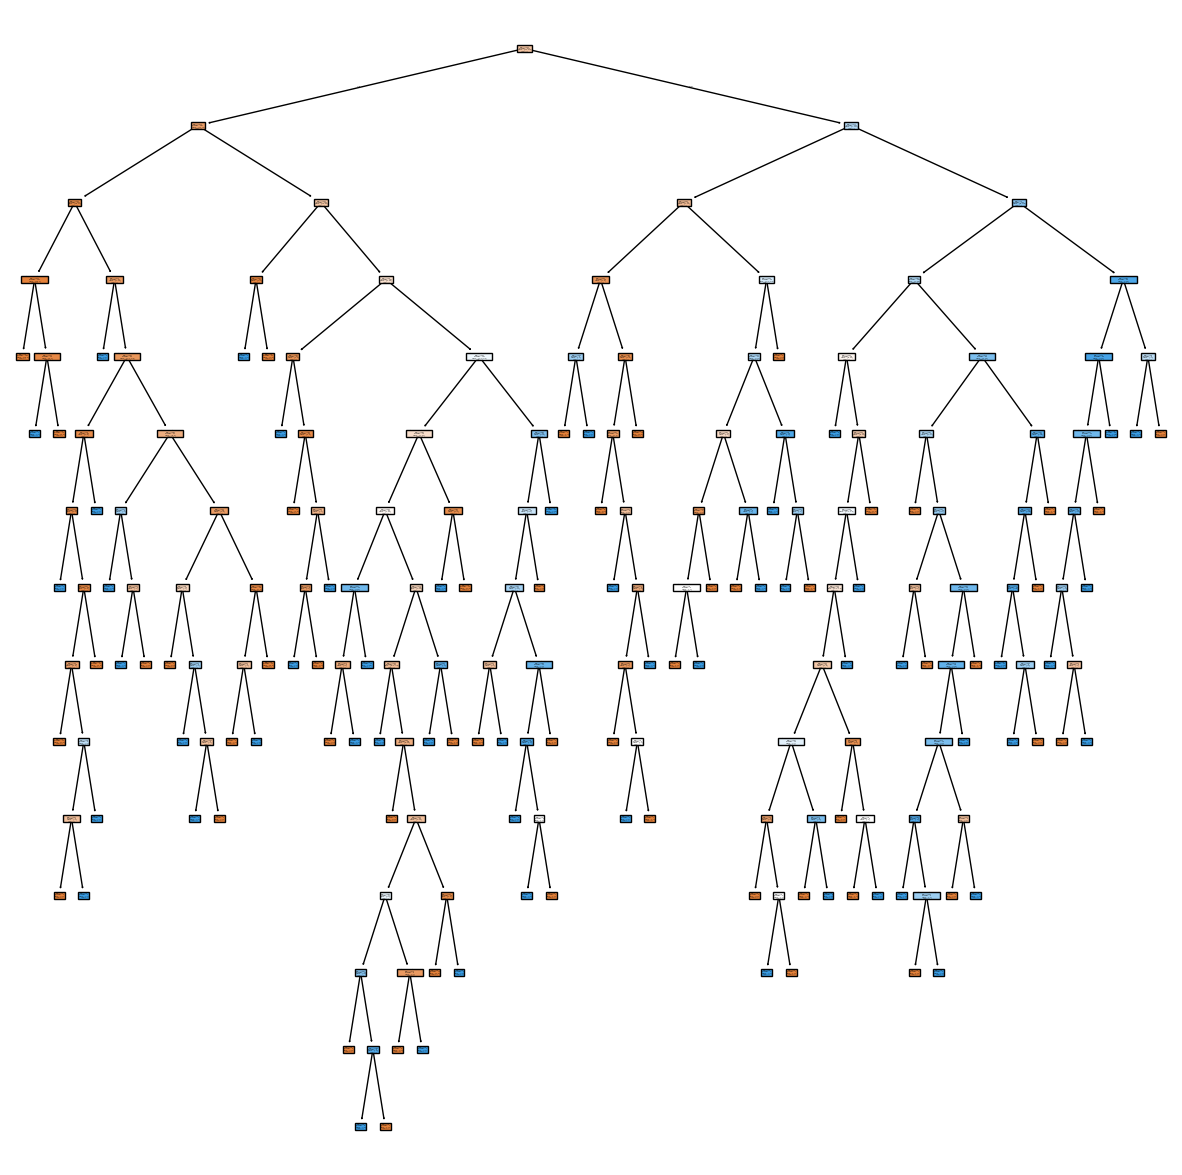

In [106]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plt.show()

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [107]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [108]:
accuracy_score(y_test, y_pred)

0.7597402597402597

## Optimizando el Modelo

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [109]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [110]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
grid.fit(X_train, y_train)
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [111]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [112]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### ⚙️ Operación del modelo
Ejecutamos una operación importante como parte del flujo del proyecto.

In [113]:
accuracy_score(y_test, y_pred)

0.7727272727272727

### 💾 Guardar el modelo
Guardamos el modelo entrenado para usarlo en el futuro.

In [114]:
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))